<a href="https://colab.research.google.com/github/LVaditya/Fraud-Detection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the packages needed

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("Fraud.csv") #loading our data which is in csv format

In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3587399,262,PAYMENT,4617.59,C1068561190,997317.0,992699.41,M1689961983,0.0,0.0,0.0,0.0
3587400,262,PAYMENT,5003.49,C231465312,10359.0,5355.51,M1423712320,0.0,0.0,0.0,0.0
3587401,262,PAYMENT,5573.60,C1825427518,30882.0,25308.40,M1584031077,0.0,0.0,0.0,0.0
3587402,262,PAYMENT,6775.37,C209215273,10841.0,4065.63,M965976262,0.0,0.0,0.0,0.0


In [ ]:
data.describe()   #to see the distribution of the features. Count is same, mean is lying in varying range, scaling is required

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.587404e+06,3.587403e+06,3.587403e+06,3.587403e+06,3.587403e+06,3.587403e+06,3.587403e+06,3.587403e+06
mean,1.445682e+02,1.563821e+05,8.375997e+05,8.590710e+05,9.938384e+05,1.097230e+06,8.237157e-04,5.575064e-07
std,8.363831e+01,2.652666e+05,2.901040e+06,2.937381e+06,2.301100e+06,2.378842e+06,2.868863e-02,7.466634e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.200000e+01,1.254165e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.620000e+02,7.573879e+04,1.450200e+04,0.000000e+00,1.373687e+05,2.226288e+05,0.000000e+00,0.000000e+00
75%,2.110000e+02,2.097947e+05,1.113544e+05,1.506135e+05,9.412498e+05,1.119614e+06,0.000000e+00,0.000000e+00
max,2.620000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.285430e+07,1.000000e+00,1.000000e+00


In [ ]:
data.info()  # we have 3 object features of which 2 are names. We can drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587404 entries, 0 to 3587403
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 301.1+ MB


In [ ]:
data.isnull().sum()  #null value present are comparatively less. Hence dropping the corresponding rows

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
data.dropna(axis = 0, inplace= True)  # null values are dropped

In [ ]:
data = pd.get_dummies(data, columns=['type']) #to handle categorical feature type and convert it into numerical feature

In [ ]:
data['isFlaggedFraud'].value_counts()  #the column isFlaggedFraud is very imbalanced most values are zero. Only a few customers are flagged

0.0    559182
Name: isFlaggedFraud, dtype: int64

In [ ]:
data = data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1) #dropping the features that are either categorical or do not have much values

In [ ]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.0,0.0,1.0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.0,0.0,1.0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.0,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3587398,262,10154.93,233937.63,223782.70,0.0,0.0,0.0,0,0,0,1,0
3587399,262,4617.59,997317.00,992699.41,0.0,0.0,0.0,0,0,0,1,0
3587400,262,5003.49,10359.00,5355.51,0.0,0.0,0.0,0,0,0,1,0
3587401,262,5573.60,30882.00,25308.40,0.0,0.0,0.0,0,0,0,1,0


In [ ]:
data['isFraud'].value_counts() 

0.0    558926
1.0       256
Name: isFraud, dtype: int64

In [ ]:
y = data['isFraud'] #assigning target vector to y

In [ ]:
X = data.drop('isFraud', axis= 1) #assigning feature matrix to X

In [ ]:
#Splitting train test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0) 

Applying scaling to the features since the lying in a very different range

In [ ]:
ss= StandardScaler()

In [ ]:
X_std = ss.fit_transform(X_train) #applying standard scaling to train data

In [ ]:
X_std_test = ss.transform(X_test) # scaling test data

<Axes: >

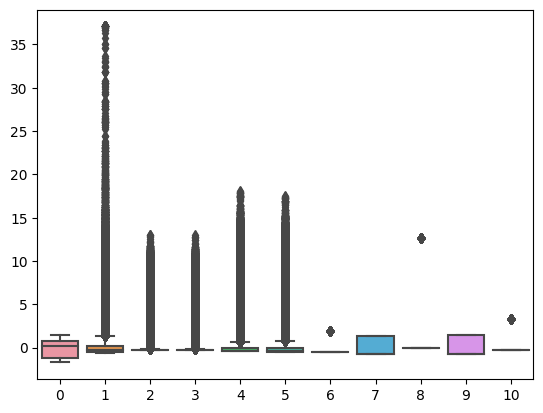

In [ ]:
sns.boxplot(data= X_std) # we can see the boxplot hence after scaling we have scaled the feature such that mean is zero 

Though outliers are present we can see if need to be removed after seeing the performance of algorithms

<Axes: >

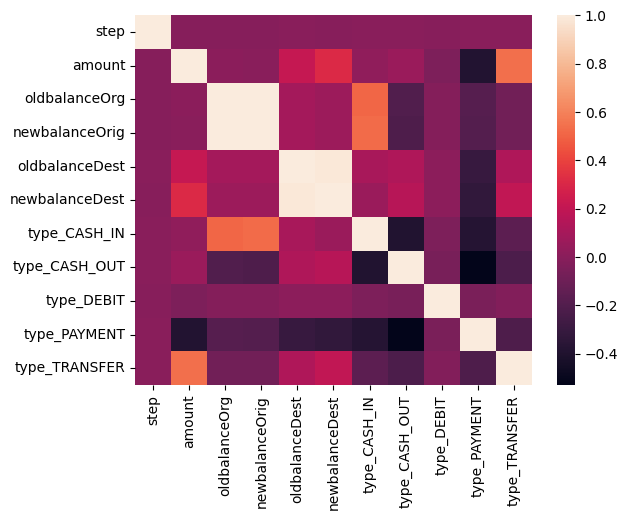

In [ ]:
sns.heatmap(X_train.corr()) #map shows that the correlation among features is not high hence we do not need to remove other features

In [ ]:
#we can see the performance of these algorithms and check its accuracy
lrc=LogisticRegression()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [25]:
gnb=GaussianNB()

Logistic Regression

In [ ]:
lrc.fit(X_std,y_train)

LogisticRegression()

In [ ]:
lrc_train_score=lrc.score(X_std,y_train) # train score of logistic regression algorithm

In [ ]:
lrc_test_score=lrc.score(X_std_test,y_test) #test score of logistic regression algorithm

In [ ]:
print("lrc: ",lrc_train_score,lrc_test_score)

lrc:  0.9996065677635932 0.9995231140651546


Decision Tree Classifier

In [ ]:
dt.fit(X_std,y_train) 

DecisionTreeClassifier()

In [ ]:
dt_train_score=dt.score(X_std,y_train) # train and test score of decision tree algorithm
dt_test_score=dt.score(X_std_test,y_test)
print("dt: ",dt_train_score,dt_test_score)


dt:  1.0 0.9995290751393401


Gradient Boosting Classifier

In [ ]:
gbc.fit(X_std,y_train)

GradientBoostingClassifier()

In [23]:
gbc_train_score=gbc.score(X_std,y_train)  # train and test score of gradient boosting algorithm
gbc_test_score=gbc.score(X_std_test,y_test)
print("gbc: ",gbc_train_score,gbc_test_score)

gbc:  0.9997317507479044 0.9996781019939793


Random Forest Classifier

In [24]:
rfc.fit(X_std,y_train)

RandomForestClassifier()

In [26]:
rfc_train_score=rfc.score(X_std,y_train) #train and test score of random forest algorithm
rfc_test_score=rfc.score(X_std_test,y_test)
print("rfc: ",rfc_train_score,rfc_test_score)

rfc:  1.0 0.999737712735835


In [28]:
gnb.fit(X_std,y_train)

GaussianNB()

In [29]:
gnb_train_score=gnb.score(X_std,y_train) #train and test score of random forest algorithm
gnb_test_score=gnb.score(X_std_test,y_test)
print("gnb: ",gnb_train_score,gnb_test_score)

gnb:  0.5646033615463419 0.5642693213317039


The score based on every algorithm are found. Assuming the best result can only be done based on the error function. 
Calculating the prediction score and accuracy can add to the selection of best suited model.

In [27]:
y_pred_lrc=lrc.predict(X_std_test)
y_pred_dt=dt.predict(X_std_test)
y_pred_rfc=rfc.predict(X_std_test)
y_pred_gbc=gbc.predict(X_std_test)

In [30]:
#lrc error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_lrc))
print("MSE:",mean_squared_error(y_test,y_pred_lrc))
print("f1_score:",f1_score(y_test,y_pred_lrc, average= 'micro'))

MAE: 0.00047688593484545915
MSE: 0.00047688593484545915
f1_score: 0.9995231140651546


In [31]:
#Decision Tree error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_dt))
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("f1_score:",f1_score(y_test,y_pred_dt, average= 'micro'))

MAE: 0.0004709248606598909
MSE: 0.0004709248606598909
f1_score: 0.9995290751393401


In [32]:
#Random Forest error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_rfc))
print("MSE:",mean_squared_error(y_test,y_pred_rfc))
print("f1_score:",f1_score(y_test,y_pred_rfc, average= 'micro'))

MAE: 0.0002622872641650025
MSE: 0.0002622872641650025
f1_score: 0.999737712735835


In [33]:
#Gradient Boosting error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_gbc))
print("MSE:",mean_squared_error(y_test,y_pred_gbc))
print("f1_score:",f1_score(y_test,y_pred_gbc, average= 'micro'))

MAE: 0.0003218980060206849
MSE: 0.0003218980060206849
f1_score: 0.9996781019939793


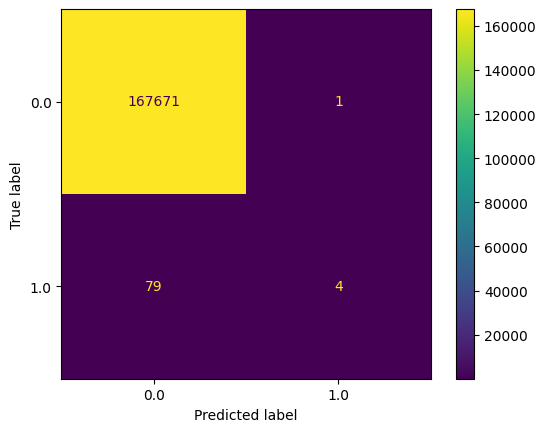

In [34]:
cm_lrc = confusion_matrix(y_test, y_pred_lrc)
fig_lrc=ConfusionMatrixDisplay(cm_lrc,display_labels = lrc.classes_)
fig_lrc.plot()

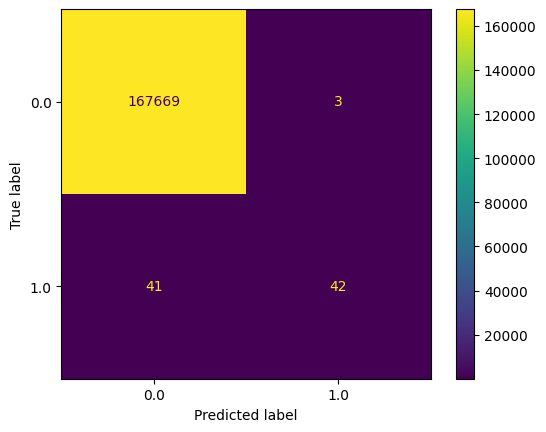

In [35]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
fig_rfc=ConfusionMatrixDisplay(cm_rfc,display_labels = rfc.classes_)
fig_rfc.plot()

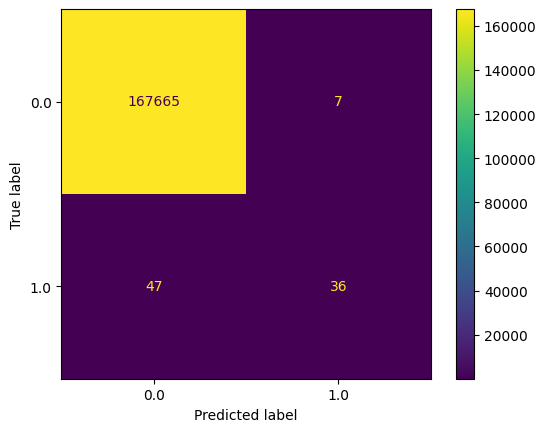

In [36]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
fig_gbc=ConfusionMatrixDisplay(cm_gbc,display_labels = gbc.classes_)
fig_gbc.plot()

Out of the models tried the better result is obtained by Random Forest Classifier. Tuning parameters for Random Forest Classifier

In [37]:
max_depth = [2,4,6,8,10]
rfc_train_score=[]
rfc_test_score=[]
rfc_f1_score=[]
rfc_MAE=[]
rfc_MSE=[]

In [39]:
for k in max_depth:
  rfc=RandomForestClassifier(n_estimators=300, max_depth= k, random_state= 0)
  rfc.fit(X_std,y_train)
  y_pred_rfc=rfc.predict(X_std_test)
  rfc_train_score.append(rfc.score(X_std,y_train))
  rfc_test_score.append(rfc.score(X_std_test,y_test))
  rfc_f1_score.append(f1_score(y_test,y_pred_rfc,average ='micro'))
  rfc_MAE.append(mean_absolute_error(y_test,y_pred_rfc))
  rfc_MSE.append(mean_squared_error(y_test,y_pred_rfc))

In [40]:
print(rfc_train_score)
print(rfc_test_score)
print(rfc_f1_score)
print(rfc_MAE)
print(rfc_MSE)

[0.9995580274227378, 0.9995759107062109, 0.9996372248209756, 0.999721531728777, 0.9998032838817966]
[0.9995052308425978, 0.9995111919167834, 0.9995708026586391, 0.999642335548866, 0.9996900241423504]
[0.9995052308425978, 0.9995111919167834, 0.9995708026586391, 0.999642335548866, 0.9996900241423504]
[0.0004947691574021638, 0.0004888080832165956, 0.00042919734136091325, 0.0003576644511340944, 0.0003099758576495484]
[0.0004947691574021638, 0.0004888080832165956, 0.00042919734136091325, 0.0003576644511340944, 0.0003099758576495484]


In [47]:
rfc_new=RandomForestClassifier(n_estimators=300, max_depth= 10, random_state= 0)
rfc_new.fit(X_std,y_train)
y_pred=rfc_new.predict(X_std_test)

In [48]:
rfc_train_score_1 = rfc_new.score(X_std,y_train)
rfc_test_score_1 = rfc_new.score(X_std_test,y_test)
rfc_f1_score_1 = f1_score(y_test,y_pred,average ='micro')
rfc_MAE_1 = mean_absolute_error(y_test,y_pred)
rfc_MSE_1 = mean_squared_error(y_test,y_pred)

In [49]:
print("train score: ",rfc_train_score_1)
print("test score: ",rfc_test_score_1)
print("f1 score: ",rfc_f1_score_1)
print("MAE: ",rfc_MAE_1)
print("MSE: ",rfc_MSE_1)

train score:  0.9998032838817966
test score:  0.9996900241423504
f1 score:  0.9996900241423504
MAE:  0.0003099758576495484
MSE:  0.0003099758576495484


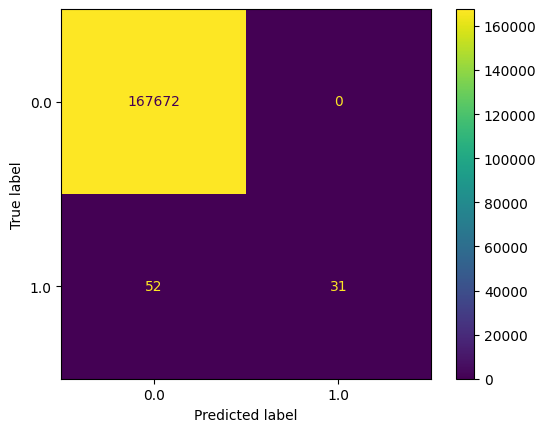

In [50]:
cm_rfc_1 = confusion_matrix(y_test, y_pred)
fig_rfc_1=ConfusionMatrixDisplay(cm_rfc_1,display_labels = rfc_new.classes_)
fig_rfc_1.plot()

The result obtained even after tuning parameters in Random Forest Algorithm was not satisfactory hence trying XGBoost Classifier

In [51]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import xgboost as xgb

In [53]:
xgb_cl= xgb.XGBClassifier()

In [54]:
xgb_cl.fit(X_std,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
y_pred_xgb=xgb_cl.predict(X_std_test)

In [56]:
xgb_train_score_1 = xgb_cl.score(X_std,y_train)
xgb_test_score_1 = xgb_cl.score(X_std_test,y_test)
xgb_f1_score_1 = f1_score(y_test,y_pred_xgb,average ='micro')
xgb_MAE_1 = mean_absolute_error(y_test,y_pred_xgb)
xgb_MSE_1 = mean_squared_error(y_test,y_pred_xgb)

In [57]:
print("train score: ",xgb_train_score_1)
print("test score: ",xgb_test_score_1)
print("f1 score: ",xgb_f1_score_1)
print("MAE: ",xgb_MAE_1)
print("MSE: ",xgb_MSE_1)

train score:  0.9999795619617451
test score:  0.9998152067002474
f1 score:  0.9998152067002474
MAE:  0.00018479329975261543
MSE:  0.00018479329975261543


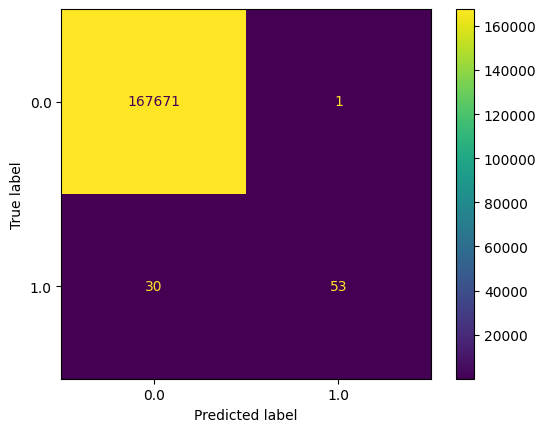

In [58]:
cm_xgb_1 = confusion_matrix(y_test, y_pred_xgb)
fig_xgb_1=ConfusionMatrixDisplay(cm_xgb_1,display_labels = xgb_cl.classes_)
fig_xgb_1.plot()

Since it gives better result when compared to other systems XGBoost Classifier is found to be the best model for this work